# Online Transactions Fraud Detection 

The goal of this project is to develop a predictive solution for online fraud detection, leveraging machine learning models on historical data. The project also aims to  analyze large amounts of data using big data technologies and to provide various data visualization options in solving real-world problems. 
The benefits of this project include improved online fraud detection, which is crucial in reducing financial losses and increasing trust in online transactions.

# Technology Used :- Python(ML), BigData, PowerBI

In [64]:
#important Librarires for data processing and Visualization
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset

In [65]:
from google.colab import drive
drive.mount('/content/drive')
df = pd.read_csv('/content/drive/MyDrive/fraud_data.csv')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Understanding the Dataset

In [66]:
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [67]:
df.tail()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.0,C776919290,0.00,339682.13,1,0
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.0,C1881841831,0.00,0.00,1,0
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.0,C1365125890,68488.84,6379898.11,1,0
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.0,C2080388513,0.00,0.00,1,0
6362619,743,CASH_OUT,850002.52,C1280323807,850002.52,0.0,C873221189,6510099.11,7360101.63,1,0


In [68]:
#Understanding the size of the DataFrame
df.shape
print("Number of records:\t\t",df.shape[0])
print("Number of features per record:\t",df.shape[1])

Number of records:		 6362620
Number of features per record:	 11


In [69]:
df.columns

Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud',
       'isFlaggedFraud'],
      dtype='object')

In [70]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [71]:
df.dtypes

step                int64
type               object
amount            float64
nameOrig           object
oldbalanceOrg     float64
newbalanceOrig    float64
nameDest           object
oldbalanceDest    float64
newbalanceDest    float64
isFraud             int64
isFlaggedFraud      int64
dtype: object

In [72]:
df.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


In [73]:
#Checking for any Duplicate records in the Data
print('Number of duplicates are : ', df.duplicated().sum())

Number of duplicates are :  0


In [74]:
#Checking for Null Values count in each columns 
df.isna().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [75]:
#Changing the colunm name as per convience for better understanding of data
df = df.rename(columns = {'nameOrig' : 'origin', 'oldbalanceOrg' : 'sender_old_balance', 'newbalanceOrig': 'sender_new_balance', 'nameDest' : 'destination', 'oldbalanceDest' : 'receiver_old_balance', 'newbalanceDest': 'receiver_new_balance', 'isFraud' : 'isfraud'})

In [76]:
df.nunique()

step                        743
type                          5
amount                  5316900
origin                  6353307
sender_old_balance      1845844
sender_new_balance      2682586
destination             2722362
receiver_old_balance    3614697
receiver_new_balance    3555499
isfraud                       2
isFlaggedFraud                2
dtype: int64

In [77]:
#Now before making changes into the original data we should make a copy of it.
copy_df=df.copy()

# Checking the Data variation

In [78]:
for col in df.iloc[:,:].select_dtypes(include=['object','float64','int64']).columns:
    print(col)
    print("_________________________________________________________________________________________________")
    print(df[col].value_counts())
    print("_________________________________________________________________________________________________")

step
_________________________________________________________________________________________________
19     51352
18     49579
187    49083
235    47491
307    46968
       ...  
432        4
706        4
693        4
112        2
662        2
Name: step, Length: 743, dtype: int64
_________________________________________________________________________________________________
type
_________________________________________________________________________________________________
CASH_OUT    2237500
PAYMENT     2151495
CASH_IN     1399284
TRANSFER     532909
DEBIT         41432
Name: type, dtype: int64
_________________________________________________________________________________________________
amount
_________________________________________________________________________________________________
10000000.00    3207
10000.00         88
5000.00          79
15000.00         68
500.00           65
               ... 
8513.48           1
189137.90         1
1615.78           1
128891.

In [79]:
#Checking the data for valid and fraud on the basis of fraud flag

print("No of Valid transactions:",df.isfraud.value_counts()[0],'which is ',round(df.isfraud.value_counts()[0]/df.shape[0] * 100,2),'%')
print("No of Fraud transactions:",df.isfraud.value_counts()[1],'which is ',round(df.isfraud.value_counts()[1]/df.shape[0] * 100,2),'%')

df.isfraud.value_counts()

No of Valid transactions: 6354407 which is  99.87 %
No of Fraud transactions: 8213 which is  0.13 %


0    6354407
1       8213
Name: isfraud, dtype: int64

In [80]:
pip install missingno

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


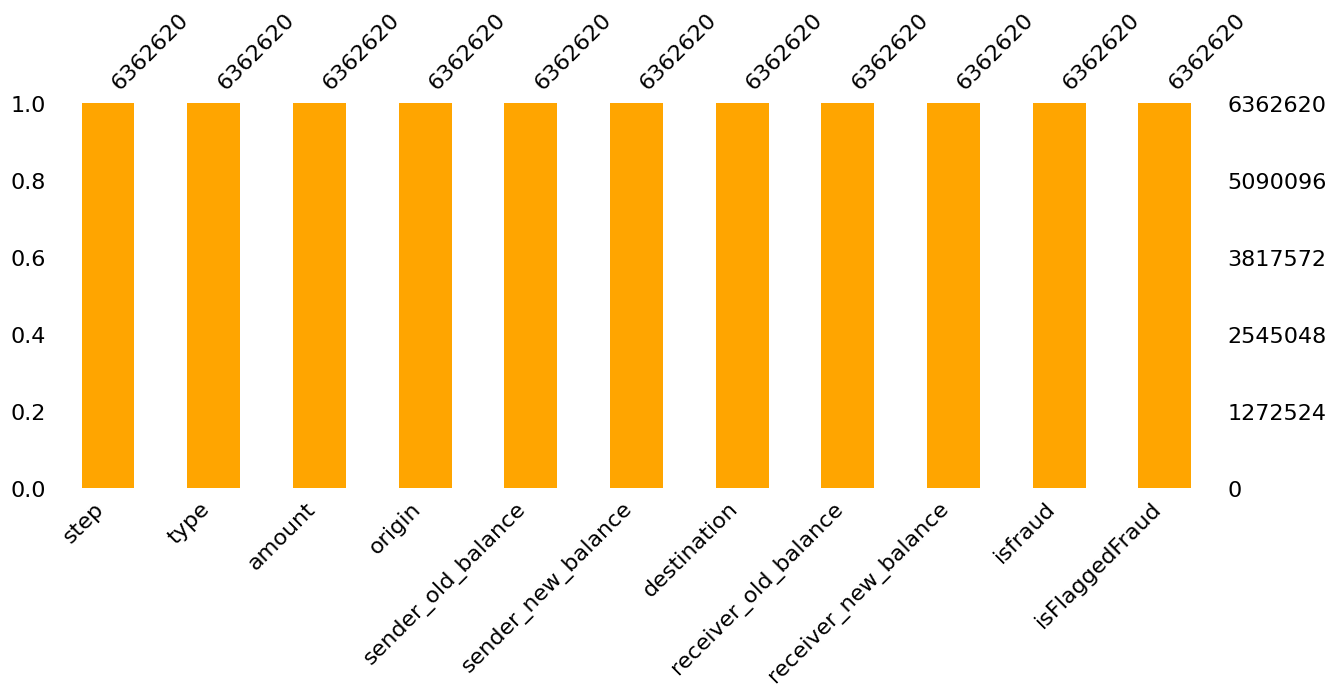

In [81]:
import missingno as msno
plt.figure(figsize = (15, 8))
msno.bar(df, figsize = (15,5), sort = 'ascending', color = "orange")
plt.show()

# Adding a new feature 

In [82]:
df['type2'] = np.nan
df.loc[df.origin.str.contains('C') & df.destination.str.contains('C'), 'type2'] = 'CC'
df.loc[df.origin.str.contains('C') & df.destination.str.contains('M'), 'type2'] = 'CM'
df.loc[df.origin.str.contains('M') & df.destination.str.contains('C'), 'type2'] = 'MC'
df.loc[df.origin.str.contains('M') & df.destination.str.contains('C'), 'type2'] = 'MM'

In [83]:
#Changing the column position for our ease of use.
cols = df.columns.tolist()
new_position = 1
cols.insert(new_position, cols.pop(cols.index('type2')))
df = df[cols]

In [84]:
#Changing the column position for our ease of use.
cols = df.columns.tolist()
new_position = 3
cols.insert(new_position, cols.pop(cols.index('destination')))
df = df[cols]

# Exploring the Data(EDA) by visualisation

# Univariate Analysis

Univariate analysis is used to analyze the data of single variable. Here we will analyze using histplot

In [85]:
col=['step','amount','sender_old_balance','sender_new_balance','receiver_old_balance','receiver_new_balance']


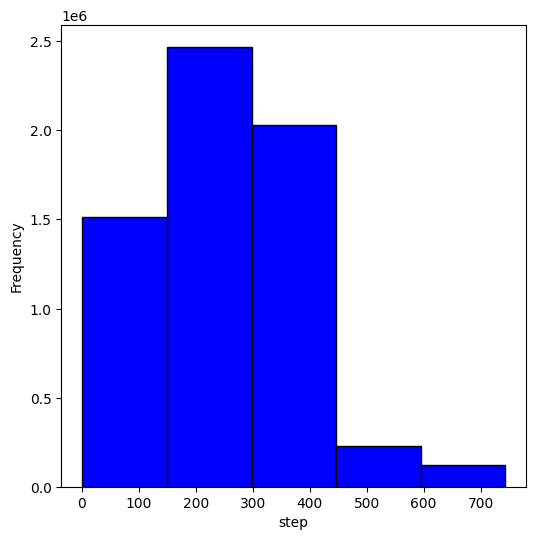

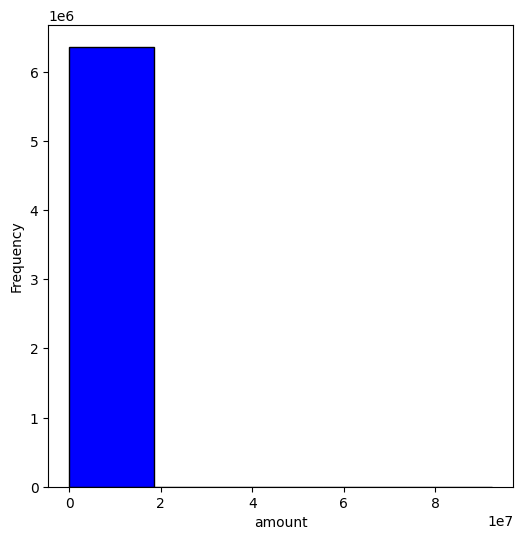

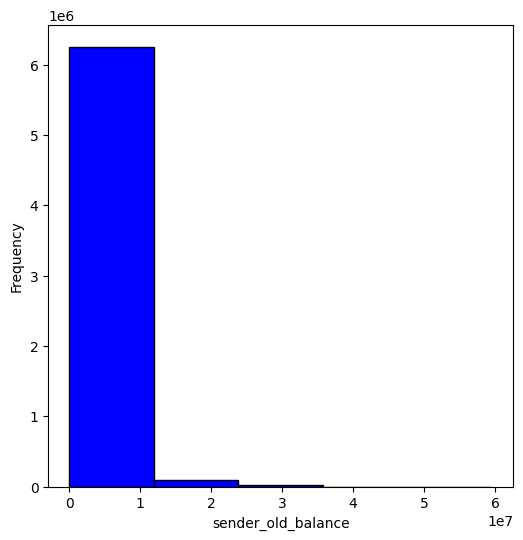

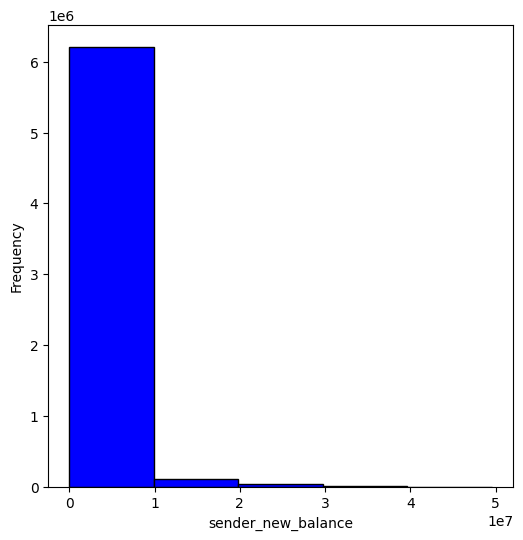

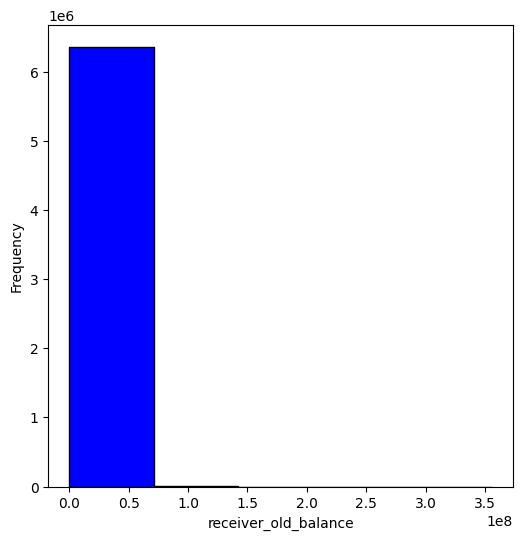

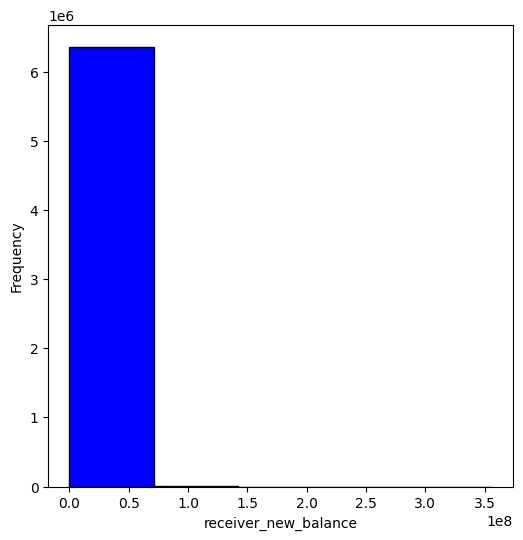

In [86]:
for i in col:
    plt.xlabel(i)
    df[i].plot(kind='hist', bins=5, figsize=(6,6), facecolor='blue',edgecolor='black')
    plt.show()




<Axes: >

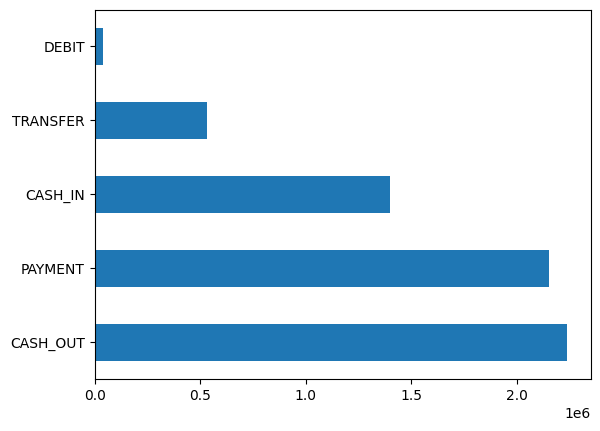

In [87]:

payment = df.type.value_counts()
payment.plot(kind='barh')



    As we have already seen there are 5 types of payment happened.
    More money has been transacted mostly through cash out followed by payment type.
CASH_OUT    2237500
PAYMENT     2151495
CASH_IN     1399284
TRANSFER     532909
DEBIT         41432

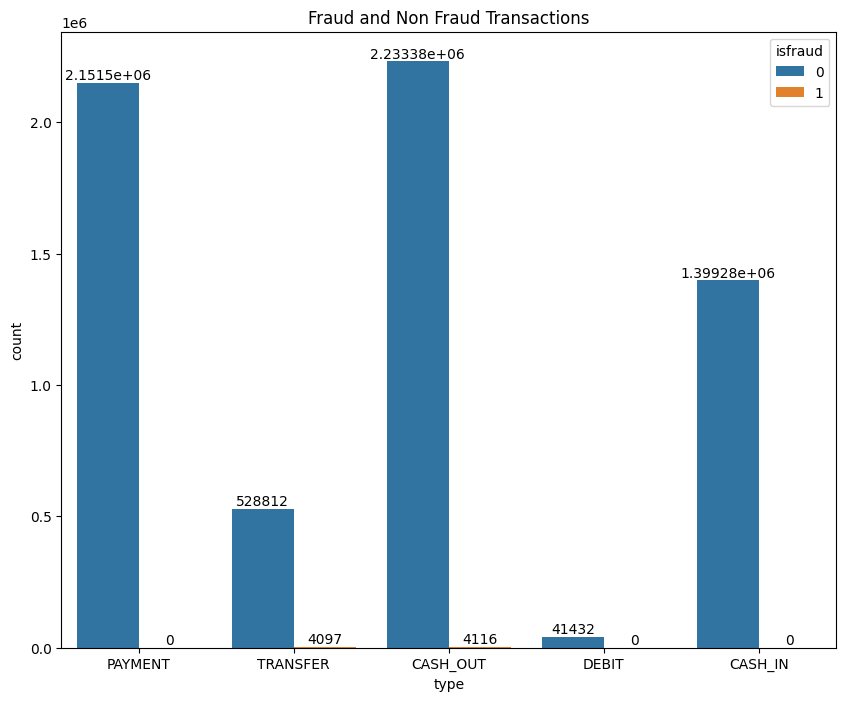

In [88]:
plt.figure(figsize = (10, 8))
ax=sns.countplot(data = df, x = "type", hue="isfraud")
plt.title('Fraud and Non Fraud Transactions')
for container in ax.containers:
    ax.bar_label(container)



We can see that fraud occurred mostly while during transfer or cashout


In [89]:
fraud_trans = df[df['isfraud'] == 1]
valid_trans = df[df['isfraud'] == 0]

print('Number of fraud transactions according to type are below:\n', fraud_trans.type2.value_counts(), '\n')
print('Number of valid transactions according to type are below:\n', valid_trans.type2.value_counts())

Number of fraud transactions according to type are below:
 CC    8213
Name: type2, dtype: int64 

Number of valid transactions according to type are below:
 CC    4202912
CM    2151495
Name: type2, dtype: int64


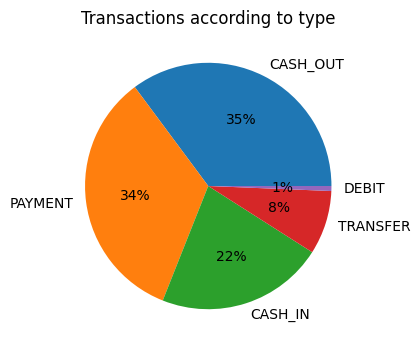

In [90]:
plt.figure(figsize=(10,4))
colors = ['#006400','#008000','#00FF00','#2E8B57','#2F4F4F']
plt.pie(df.type.value_counts().values,labels=df.type.value_counts().index, autopct='%.0f%%')
plt.title("Transactions according to type")
plt.show()

Text(0.5, 1.0, 'Valid')

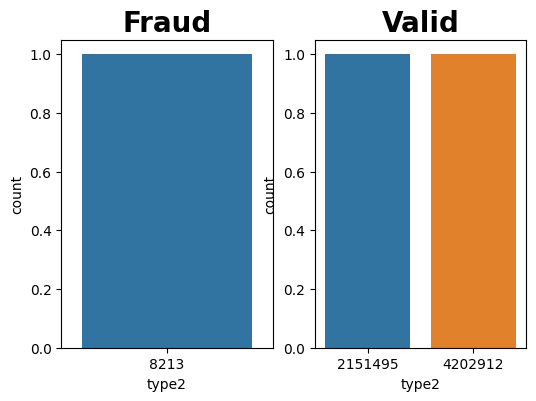

In [91]:
fr = fraud_trans.type2.value_counts()
va = valid_trans.type2.value_counts()
plt.figure(figsize=(6, 4))
plt.subplot(1,2,1)
sns.countplot(x = fr)
plt.title('Fraud',fontweight="bold", size=20)
plt.subplot(1,2,2)
sns.countplot(x = va)
plt.title('Valid',fontweight="bold", size=20)

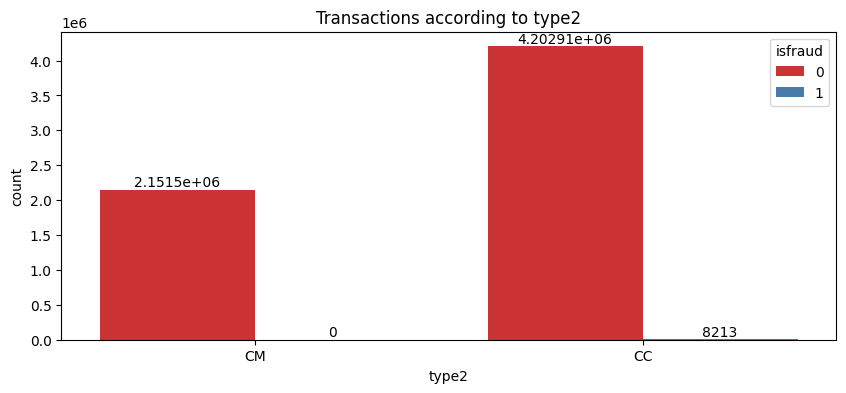

In [92]:
plt.figure(figsize = (10, 4))
ax=sns.countplot(data = df, x = "type2", hue="isfraud", palette = 'Set1')
plt.title('Transactions according to type2')
for container in ax.containers:
    ax.bar_label(container)

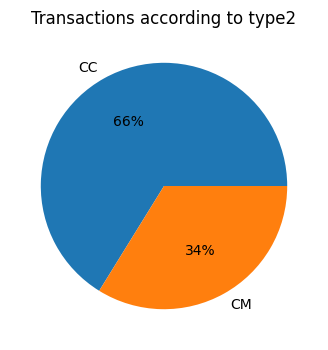

In [93]:
plt.figure(figsize=(10,4))
colors = ['#006400','#008000']
plt.pie(df.type2.value_counts().values,labels=df.type2.value_counts().index,  autopct='%.0f%%')
plt.title("Transactions according to type2")
plt.show()

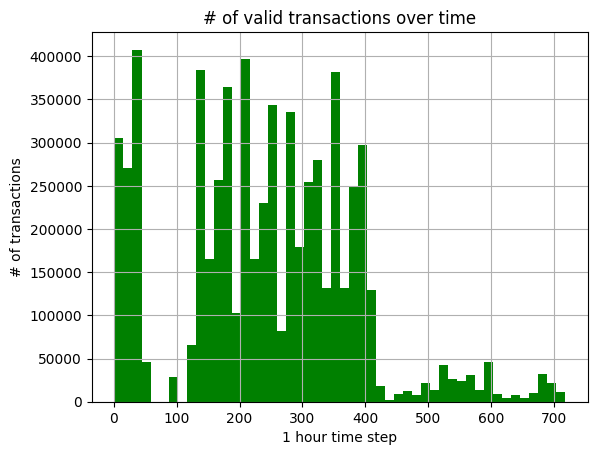

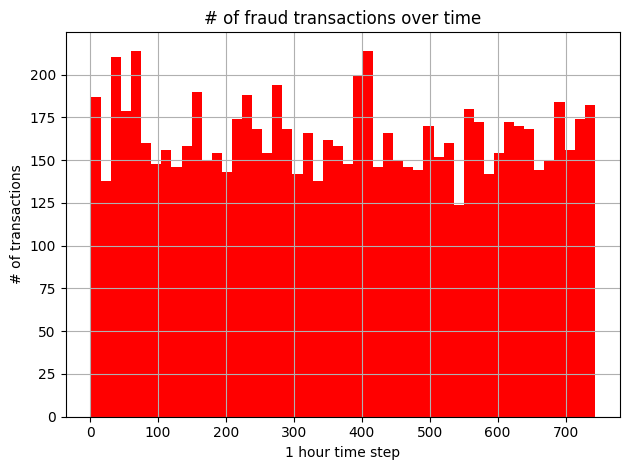

In [94]:
bins = 50

valid_trans.hist(column="step",color="green",bins=bins)
plt.xlabel("1 hour time step")
plt.ylabel("# of transactions")
plt.title("# of valid transactions over time")

fraud_trans.hist(column ="step",color="red",bins=bins)
plt.xlabel("1 hour time step")
plt.ylabel("# of transactions")
plt.title("# of fraud transactions over time")

plt.tight_layout()
plt.show()

A large proportion of valid transactions occur between around the 0th and 60th timestep as well as the 110th and 410th time-steps.
The frequency at which fraudulent transactions occur does not seem to change much over time

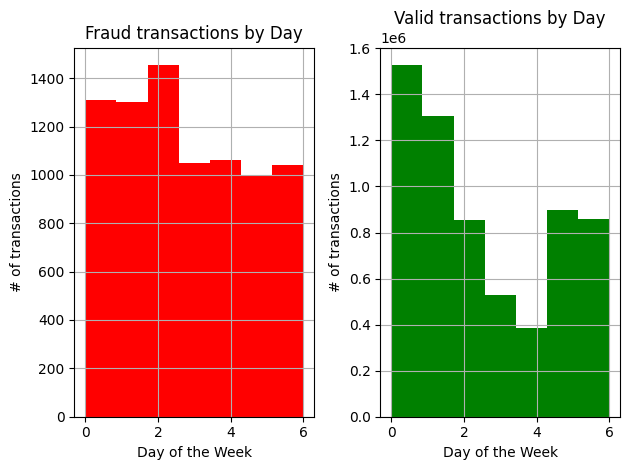

In [95]:
num_days = 7
num_hours = 24
fraud_days = (fraud_trans.step//num_hours)% num_days
fraud_hours = fraud_trans.step % num_hours
valid_days = (valid_trans.step//num_hours) % num_days
valid_hours = valid_trans.step % num_hours

# plotting scatterplot of the days of the week, identifying the fraudulent transactions (red) from the valid transactions (green) 
plt.subplot(1, 2, 1)
fraud_days.hist(bins=num_days,color="red")
plt.title('Fraud transactions by Day')
plt.xlabel('Day of the Week')
plt.ylabel("# of transactions")

plt.subplot(1,2,2)
valid_days.hist(bins=num_days,color="green")
plt.title('Valid transactions by Day')
plt.xlabel('Day of the Week')
plt.ylabel("# of transactions")

plt.tight_layout()
plt.show()



From the graphs above, there is little evidence to suggest that fraudulent transactions occur at particular days of the week.

While valid transactions occur less on some two consecutive days of the week.


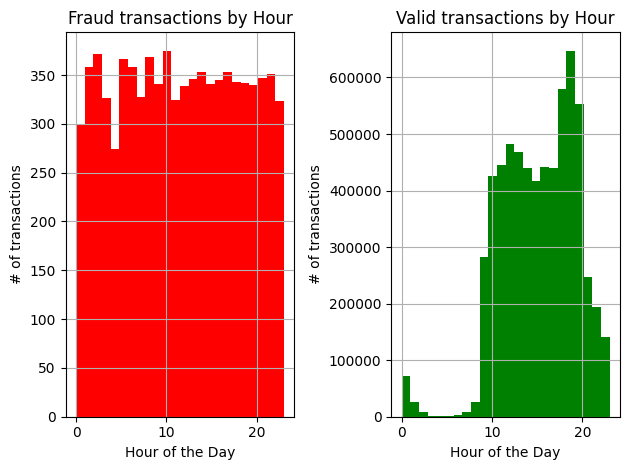

In [96]:
plt.subplot(1, 2, 1)
fraud_hours.hist(bins=num_hours, color="red")
plt.title('Fraud transactions by Hour')
plt.xlabel('Hour of the Day')
plt.ylabel("# of transactions")


plt.subplot(1, 2, 2)
valid_hours.hist(bins=num_hours, color="green")
plt.title('Valid transactions by Hour')
plt.xlabel('Hour of the Day')
plt.ylabel("# of transactions")

plt.tight_layout()
plt.show()



We observe that from hour 0 to hour 9 valid transactions very seldom occur. On the other hand, fraudulent transactions still occur at similar rates to any hour of the day outside of hours 0 to 9 .

In response to this, We1m will create another feature HourOfDay, which is the step column with each number taken to modulo 24

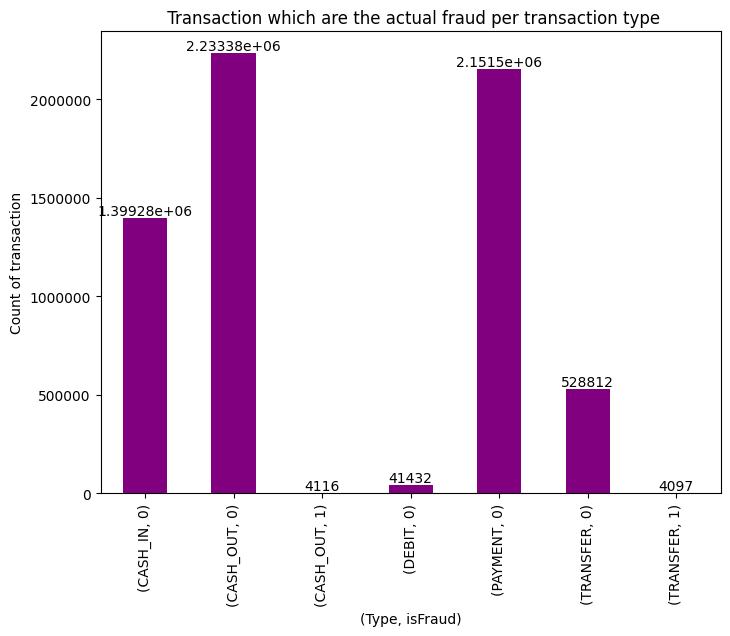

In [97]:


ax = df.groupby(['type', 'isfraud']).size().plot(kind='bar',figsize=(8, 6), color='purple')
ax.set_title(" Transaction which are the actual fraud per transaction type")
ax.set_xlabel("(Type, isFraud)")
ax.set_ylabel("Count of transaction")
plt.ticklabel_format(style='plain', axis='y')
for container in ax.containers:
    ax.bar_label(container)


# Bivariate Analysis

<ipython-input-98-044190b5140e>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()# plot the heatmap


<Axes: >

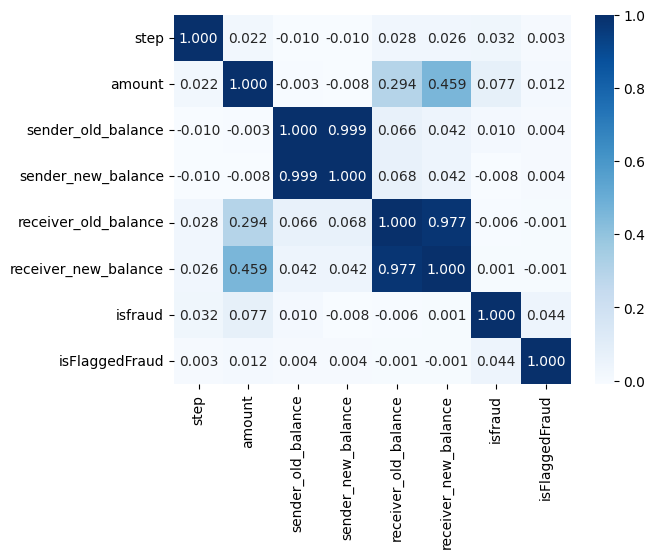

In [98]:


# calculate correlation matrix
corr = df.corr()# plot the heatmap
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, annot=True, cmap='Blues' ,fmt=".3f")



In [99]:
data = df.drop(columns = ['step', 'isFlaggedFraud','origin','destination'], axis = 'columns')


In [100]:
data


,type2,type,amount,sender_old_balance,sender_new_balance,receiver_old_balance,receiver_new_balance,isfraud
0,CM,PAYMENT,9839.64,170136.00,160296.36,0.00,0.00,0
1,CM,PAYMENT,1864.28,21249.00,19384.72,0.00,0.00,0
2,CC,TRANSFER,181.00,181.00,0.00,0.00,0.00,1
3,CC,CASH_OUT,181.00,181.00,0.00,21182.00,0.00,1
4,CM,PAYMENT,11668.14,41554.00,29885.86,0.00,0.00,0
...,...,...,...,...,...,...,...,...
6362615,CC,CASH_OUT,339682.13,339682.13,0.00,0.00,339682.13,1
6362616,CC,TRANSFER,6311409.28,6311409.28,0.00,0.00,0.00,1
6362617,CC,CASH_OUT,6311409.28,6311409.28,0.00,68488.84,6379898.11,1
6362618,CC,TRANSFER,850002.52,850002.52,0.00,0.00,0.00,1


In [101]:
#Handling Categorical Variables converting them to numerical data for better modelling
data_new = pd.get_dummies(data,prefix=['type','Type2'],drop_first=True)

# Train-Test Split Standardizing Data

In [102]:
X = data_new.drop('isfraud', 1)
y = data_new.isfraud

<ipython-input-102-afddcb0bca40>:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X = data_new.drop('isfraud', 1)


In [103]:

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler



X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [104]:
X_train.dtypes

amount                  float64
sender_old_balance      float64
sender_new_balance      float64
receiver_old_balance    float64
receiver_new_balance    float64
type_CM                   uint8
Type2_CASH_OUT            uint8
Type2_DEBIT               uint8
Type2_PAYMENT             uint8
Type2_TRANSFER            uint8
dtype: object

In [105]:
# Normalizing data so that all variables follow the same scale (0 to 1)
scaler = StandardScaler()

# Fit only to the training data
scaler.fit(X_train)

# Now apply the transformations to the data:
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [106]:
print("Shape of X_train: ", X_train.shape)
print("Shape of X_test: ", X_test.shape)

Shape of X_train:  (5090096, 10)
Shape of X_test:  (1272524, 10)


In [107]:
print('fruad ',fraud_trans.shape)
print('Valid', valid_trans.shape)

fruad  (8213, 12)
Valid (6354407, 12)


In [108]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier # Decision tree algorithm
from sklearn.ensemble import RandomForestClassifier # Random forest tree algorithm
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score, roc_curve, auc, precision_score,recall_score,f1_score

In [109]:
#Model 1 Logistic Regression
X_train, X_test, y_train, y_test = train_test_split(X, y)
from imblearn.under_sampling import RandomUnderSampler
rus = RandomUnderSampler(sampling_strategy=0.2)
X_res, y_res = rus.fit_resample(X_train, y_train)
                                
clf = LogisticRegression()
clf.fit(X_res, y_res)
y_pred = clf.predict(X_test)
y_predtrain = clf.predict(X_train)
CM_LR = confusion_matrix(y_test,y_pred)
CR_LR = classification_report(y_test,y_pred)
CM_LRtrain = confusion_matrix(y_train,y_predtrain)
CR_LRtrain = classification_report(y_train,y_predtrain)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n",CM_LR)
print("Classification Report:\n",CR_LR)
print("Confusion Matrix Train:\n",CM_LRtrain)
print("Classification Report Train:\n",CR_LRtrain)
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1:", f1_score(y_test, y_pred))


Accuracy: 0.9087715437979952
Confusion Matrix:
 [[1443604  145025]
 [     88    1938]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.91      0.95   1588629
           1       0.01      0.96      0.03      2026

    accuracy                           0.91   1590655
   macro avg       0.51      0.93      0.49   1590655
weighted avg       1.00      0.91      0.95   1590655

Confusion Matrix Train:
 [[4330211  435567]
 [    264    5923]]
Classification Report Train:
               precision    recall  f1-score   support

           0       1.00      0.91      0.95   4765778
           1       0.01      0.96      0.03      6187

    accuracy                           0.91   4771965
   macro avg       0.51      0.93      0.49   4771965
weighted avg       1.00      0.91      0.95   4771965

Precision: 0.013186992644407095
Recall: 0.9565646594274433
F1: 0.0260153434146145


In [110]:
#Model 2 Decision tree
# Train model
DT = DecisionTreeClassifier()
fitted_vals = DT.fit(X_res, y_res)
 
# Predict on testing set
predictionsDT = DT.predict(X_test)
 
     
# Evaluating model
CM_DT = confusion_matrix(y_test,predictionsDT)
CR_DT = classification_report(y_test,predictionsDT)
fprDT, recallDT, thresholdsDT = roc_curve(y_test, predictionsDT)
AUC_DT = auc(fprDT, recallDT)

resultsDT = {"Confusion Matrix":CM_DT,"Classification Report":CR_DT,"Area Under Curve":AUC_DT}



for measure in resultsDT:
    print(measure,": \n",resultsDT[measure])
print('Accuracy: ',accuracy_score(y_test,predictionsDT))

Confusion Matrix : 
 [[1583421    5208]
 [     30    1996]]
Classification Report : 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00   1588629
           1       0.28      0.99      0.43      2026

    accuracy                           1.00   1590655
   macro avg       0.64      0.99      0.72   1590655
weighted avg       1.00      1.00      1.00   1590655

Area Under Curve : 
 0.9909570995373669
Accuracy:  0.9967070169207025


In [111]:
#Model 3 Random forest cassifier
parametersRF = {'n_estimators':15,'class_weight': "balanced",'n_jobs':-1,'random_state':42}
RF = RandomForestClassifier(**parametersRF)
fitted_vals = RF.fit(X_res, y_res)
 
# Predict on testing set
predictionsRF = RF.predict(X_test)
 
     
# Evaluating model
CM_RF = confusion_matrix(y_test,predictionsRF)
CR_RF = classification_report(y_test,predictionsRF)
fprRF, recallRF, thresholdsRF = roc_curve(y_test, predictionsRF)
AUC_RF = auc(fprRF, recallRF)

resultsRF = {"Confusion Matrix":CM_RF,"Classification Report":CR_RF,"Area Under Curve":AUC_RF}

# showing results from Random Forest

for measure in resultsRF:
    print(measure,": \n",resultsRF[measure])
print(accuracy_score(y_test, predictionsRF))

Confusion Matrix : 
 [[1581198    7431]
 [     27    1999]]
Classification Report : 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00   1588629
           1       0.21      0.99      0.35      2026

    accuracy                           1.00   1590655
   macro avg       0.61      0.99      0.67   1590655
weighted avg       1.00      1.00      1.00   1590655

Area Under Curve : 
 0.9909978147653435
0.9953113654437952
